# Machine Learning Algorithms Comparison of Predicting Potential Credit Card Customers with Credit Risk Analysis

By: Denny Dewanta

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Import Dataset

In [2]:
data = pd.read_csv("application_record.csv", encoding = 'utf-8') 
record = pd.read_csv("credit_record.csv", encoding = 'utf-8') 

In [3]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [7]:
data.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [8]:
record.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [9]:
# define function for unique values, will be used in the next sections
def unique_val(df):
    unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],
                                              columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
    return unique_counts

# Unique values
unique_val(data)

,Column_Name,Num_Unique
12,FLAG_MOBIL,1
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
15,FLAG_EMAIL,2
14,FLAG_PHONE,2
13,FLAG_WORK_PHONE,2
8,NAME_FAMILY_STATUS,5
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5


## Simple EDA

To get to know the details of the dataset.

### Gender Distribution

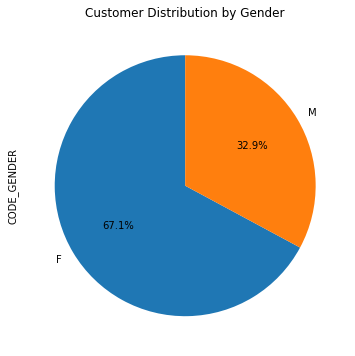

In [10]:
fig1 = data['CODE_GENDER'].value_counts().plot(kind='pie', startangle=90,
                                               title='Customer Distribution by Gender', figsize=(6,6),
                                               autopct='%1.1f%%')

### Car Ownership Distribution

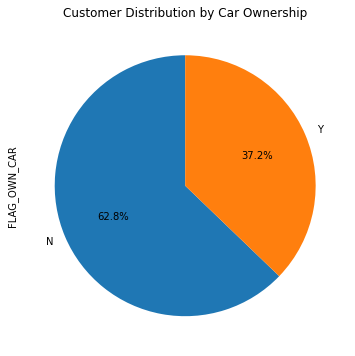

In [11]:
fig2 = data['FLAG_OWN_CAR'].value_counts().plot(kind='pie', startangle=90,
                                                title='Customer Distribution by Car Ownership', figsize=(6,6),
                                                autopct='%1.1f%%')

### Realty Ownership Distribution

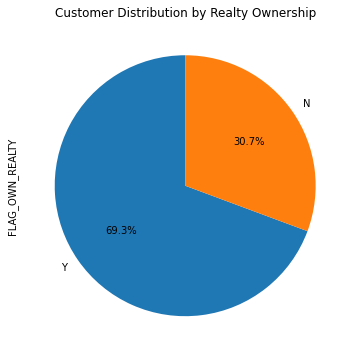

In [12]:
fig3 = data['FLAG_OWN_REALTY'].value_counts().plot(kind='pie', startangle=90,
                                                   title='Customer Distribution by Realty Ownership', figsize=(6,6),
                                                   autopct='%1.1f%%')

### Income Type & Family Status Distribution

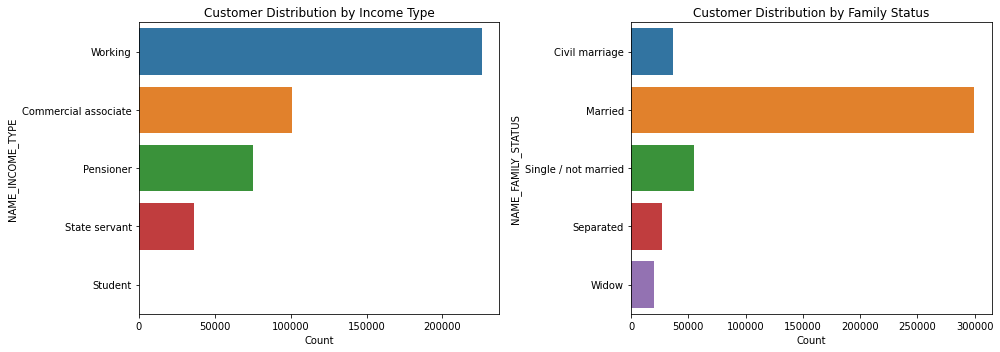

In [13]:
fig4, axes = plt.subplots(1,2)

# Subplot 1
g1=sns.countplot(y=data.NAME_INCOME_TYPE,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by Income Type")
g1.set_xlabel("Count")

# Subplot 2
g2=sns.countplot(y=data.NAME_FAMILY_STATUS,linewidth=1.2, ax=axes[1])
g2.set_title("Customer Distribution by Family Status")
g2.set_xlabel("Count")

fig4.set_size_inches(14,5)
plt.tight_layout()
plt.show()

## Pre-processing

In [14]:
# Remove duplicated ID and keep the last one
data = data.drop_duplicates('ID', keep='last')

In [15]:
# Drop OCCUPATION TYPE because of it has missing values
data.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [16]:
# Rename the columns
data.rename(columns={"CODE_GENDER":"gender",
                     "FLAG_OWN_CAR":"own_car",
                     "FLAG_OWN_REALTY":"own_realty",
                     "CNT_CHILDREN":"children_count",
                     "AMT_INCOME_TOTAL":"income",
                     "NAME_EDUCATION_TYPE":"education",
                     "NAME_FAMILY_STATUS":"family_status",
                     "NAME_HOUSING_TYPE":"housing_type",
                     "DAYS_BIRTH":"birthday",
                     "DAYS_EMPLOYED":"employment_date",
                     "FLAG_MOBIL":"own_mobile",
                     "FLAG_WORK_PHONE":"own_work_phone",
                     "FLAG_PHONE":"own_phone",
                     "FLAG_EMAIL":"own_email",
                     "CNT_FAM_MEMBERS":"family_member_count",
                     "NAME_INCOME_TYPE":"income_type"},
            inplace=True)

In [17]:
# Merge the two datasets
open_month = pd.DataFrame(record.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
open_month = open_month.rename(columns={'MONTHS_BALANCE':'begin_month'}) 
df = pd.merge(data,open_month,how="left",on="ID")

In [18]:
# Categorical variables to numeric

df["gender"] =  df['gender'].replace(['F','M'],[0,1])
df["own_car"] = df["own_car"].replace(["Y","N"],[1,0])
df["own_realty"] = df["own_realty"].replace(["Y","N"],[1,0])
# Narrow the categories down to two: having income and not
df["is_working"] = df["income_type"].replace(["Working","Commercial associate",
                                              "State servant","Pensioner","Student"],[1,1,1,0,0])
# Narrow the categories down to two: with in relationship and not in relationship
df["family_status"] = df["family_status"].replace(["Civil marriage","Married","Single / not married",
                                                     "Separated","Widow"],[1,1,0,0,0])
# Narrow the categories down to two: with parents and without parents
df["housing_type"] = df["housing_type"].replace(["House / apartment","With parents","Municipal apartment",
                                                "Rented apartment","Office apartment","Co-op apartment"],
                                                [1,0,1,1,1,1])
# Categorical education to numeric. With assumption secondary and lower secondary have same level, higher and incomplete higher have same lecel
df["education"] = df["education"].replace(["Secondary / secondary special","Lower secondary","Higher education",
                                          "Incomplete higher","Academic degree"],[0,0,1,1,2])

df["in_relationship"] = df["family_status"]

Pensioner and student converted to zero values because those variables represent group of people with no income. Same with family_status to make new category, in relationship and not in relationship.

In [19]:
# To get the customers' age
df["Age"] = round((df.birthday/365)*-1)

In [20]:
# To get the customers' experience years
df["experience"] = df.employment_date/365
df['experience'] = df['experience'].apply(lambda v : int(v*-1) if v <0 else 0)

In [21]:
df["household_size"] = df["children_count"] + df["family_status"].apply(lambda x: 2 if x==1 else 1)

In [22]:
df.head()

,ID,gender,own_car,own_realty,children_count,income,income_type,education,family_status,housing_type,...,own_work_phone,own_phone,own_email,family_member_count,begin_month,is_working,in_relationship,Age,experience,household_size
0,5008804,1,1,1,0,427500.0,Working,1,1,1,...,1,0,0,2.0,-15.0,1,1,33.0,12,2
1,5008805,1,1,1,0,427500.0,Working,1,1,1,...,1,0,0,2.0,-14.0,1,1,33.0,12,2
2,5008806,1,1,1,0,112500.0,Working,0,1,1,...,0,0,0,2.0,-29.0,1,1,59.0,3,2
3,5008808,0,0,1,0,270000.0,Commercial associate,0,0,1,...,0,1,1,1.0,-4.0,1,0,52.0,8,1
4,5008809,0,0,1,0,270000.0,Commercial associate,0,0,1,...,0,1,1,1.0,-26.0,1,0,52.0,8,1


In [23]:
# Removing outliers that can affect the model

# Using Z scores by make Z scores function and save the Z score results in new column
def z_scores(df, cols):
    for col in cols:
        df[col+"_z_score"] = (df[col]-df[col].mean())/df[col].std()
    return df
df2 = z_scores(df=df, cols = ["income","experience","household_size"])

# Removing outliers if |z| > 3
filter1 = df2.household_size_z_score.abs() <= 3
filter2 = df2.experience_z_score.abs() <= 3
filter3 = df2.income_z_score.abs() <= 3

# Use the filter
df = df2[filter1 & filter2 & filter3]

# Drop the Z scores column
df.drop(columns= ["income_z_score","experience_z_score","household_size_z_score"],inplace=True)

C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


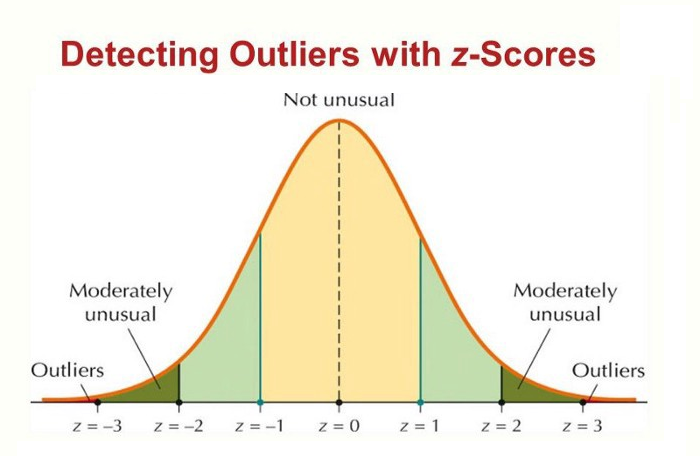

Source: https://www.analyticsvidhya.com/blog/2022/08/dealing-with-outliers-using-the-z-score-method/

Don't worry, the removed rows of data in df will not affect the record dataframe if we use inner join on the next step.

In [24]:
# Make new columns dep_value and set it as none
record['dep_value'] = None
# Fill the dep_value with conditional value
record['dep_value'][record['STATUS'] =='2']='Yes' 
record['dep_value'][record['STATUS'] =='3']='Yes' 
record['dep_value'][record['STATUS'] =='4']='Yes' 
record['dep_value'][record['STATUS'] =='5']='Yes'

# Store the grouped record to record count so each ID has one row only
record_count=record.groupby('ID').count()
# If there is dep_value after the counting, then set the dep_value in record_count as 'Yes'
record_count['dep_value'][record_count['dep_value'] > 0]='Yes' 
record_count['dep_value'][record_count['dep_value'] == 0]='No'
record_count = record_count[['dep_value']]

C:\Users\lenov\AppData\Local\Temp/ipykernel_7444/3999512726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['dep_value'][record['STATUS'] =='2']='Yes'
C:\Users\lenov\AppData\Local\Temp/ipykernel_7444/3999512726.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['dep_value'][record['STATUS'] =='3']='Yes'
C:\Users\lenov\AppData\Local\Temp/ipykernel_7444/3999512726.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec

record[1,'STATUS']

In [25]:
# Make sure the dep_value already inserted with None or 'Yes'
for col in record.select_dtypes(include=[object]):
    print(col,":", record[col].unique())

STATUS : ['X' '0' 'C' '1' '2' '3' '4' '5']
dep_value : [None 'Yes']


In [26]:
record_count

,dep_value
ID,
5001711,No
5001712,No
5001713,No
5001714,No
5001715,No
...,...
5150482,No
5150483,No
5150484,No


In [27]:
# Check unique values
unique_val(record_count)

,Column_Name,Num_Unique
0,dep_value,2


In [28]:
# Data frame to analyze length of time since initial approval of credit card
# Shows number of past dues, paid off and no loan status.
grouped = record.groupby('ID')

# Using pivot table
pivot_tb = record.pivot(index='ID', columns='MONTHS_BALANCE', values='STATUS')
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max()
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month']
pivot_tb['window'] += 1 # Adding 1 since month starts at 0.

# Counting past dues, paid offs and no loans by count
pivot_tb['paid_off'] = pivot_tb[pivot_tb.iloc[:,0:61]=='C'].count(axis=1)
pivot_tb['pastdue_1-29'] = pivot_tb[pivot_tb.iloc[:,0:61]=='0'].count(axis=1)
pivot_tb['pastdue_30-59'] = pivot_tb[pivot_tb.iloc[:,0:61]=='1'].count(axis=1)
pivot_tb['pastdue_60-89'] = pivot_tb[pivot_tb.iloc[:,0:61]=='2'].count(axis=1)
pivot_tb['pastdue_90-119'] = pivot_tb[pivot_tb.iloc[:,0:61]=='3'].count(axis=1)
pivot_tb['pastdue_120-149'] = pivot_tb[pivot_tb.iloc[:,0:61]=='4'].count(axis=1)
pivot_tb['pastdue_over_150'] = pivot_tb[pivot_tb.iloc[:,0:61]=='5'].count(axis=1)
pivot_tb['no_loan'] = pivot_tb[pivot_tb.iloc[:,0:61] == 'X'].count(axis = 1)
#Setting Id column to merge with app data.
pivot_tb['ID'] = pivot_tb.index

# Make new dataframe to move values from pivot table
target = pd.DataFrame()
target['ID'] = pivot_tb.index
target['paid_off'] = pivot_tb['paid_off'].values
target['#_of_pastdues'] = pivot_tb['pastdue_1-29'].values+ pivot_tb['pastdue_30-59'].values + pivot_tb['pastdue_60-89'].values +pivot_tb['pastdue_90-119'].values+pivot_tb['pastdue_120-149'].values +pivot_tb['pastdue_over_150'].values
target['no_loan'] = pivot_tb['no_loan'].values
df3 = df.merge(target, how='inner', on='ID')

# Make label for the model
df4=pd.merge(df3,record_count,how='inner',on='ID')
df4['target']=df4['dep_value']
df4.loc[df4['target']=='Yes','target']=1
df4.loc[df4['target']=='No','target']=0

df4.drop(columns=["dep_value"],inplace=True)

In [29]:
pivot_tb.head()

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,window,paid_off,pastdue_1-29,pastdue_30-59,pastdue_60-89,pastdue_90-119,pastdue_120-149,pastdue_over_150,no_loan,ID
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,0,3,0,0,0,0,0,1,5001711
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19,9,10,0,0,0,0,0,0,5001712
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22,0,0,0,0,0,0,0,22,5001713
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15,0,0,0,0,0,0,0,15,5001714
5001715,NaN,X,X,X,X,X,X,X,X,X,...,60,0,0,0,0,0,0,0,60,5001715


In [30]:
# Drop income_type
df4.drop('income_type', axis=1, inplace=True)

In [31]:
df4.head()

,ID,gender,own_car,own_realty,children_count,income,education,family_status,housing_type,birthday,...,begin_month,is_working,in_relationship,Age,experience,household_size,paid_off,#_of_pastdues,no_loan,target
0,5008804,1,1,1,0,427500.0,1,1,1,-12005,...,-15.0,1,1,33.0,12,2,13,2,1,0
1,5008805,1,1,1,0,427500.0,1,1,1,-12005,...,-14.0,1,1,33.0,12,2,12,2,1,0
2,5008806,1,1,1,0,112500.0,0,1,1,-21474,...,-29.0,1,1,59.0,3,2,7,7,16,0
3,5008808,0,0,1,0,270000.0,0,0,1,-19110,...,-4.0,1,0,52.0,8,1,0,2,3,0
4,5008809,0,0,1,0,270000.0,0,0,1,-19110,...,-26.0,1,0,52.0,8,1,0,0,5,0


In [32]:
# Calculate information value
def calc_iv(df, feature, target, pr=False):
    lst = []
    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    
    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())

    iv = data['IV'].sum()
    print('This variable\'s IV is:',iv)
    print(df[feature].value_counts())
    return iv, data

In [33]:
ivtable=pd.DataFrame(df4.columns,columns=['variable'])
ivtable['IV']=None
namelist = ['birthday','employment_date','begin_month','dep_value','target','ID', 'paid_off', '#_of_pastdues', 'no_loan']

for i in namelist:
    ivtable.drop(ivtable[ivtable['variable'] == i].index, inplace=True)

In [34]:
# IV calculation Gender
iv, data = calc_iv(df4,'gender','target')
ivtable.loc[ivtable['variable']=='gender','IV']=iv
data.head()

This variable's IV is: 0.015681939379883297
0    23305
1    11572
Name: gender, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,gender,0,23305,22945,360,0.668205,0.015447,0.669224,0.609137,0.094075,0.005653
1,gender,1,11572,11341,231,0.331795,0.019962,0.330776,0.390863,-0.166914,0.010029


In [35]:
# IV calculation own_car
iv, data = calc_iv(df4,'own_car','target')
ivtable.loc[ivtable['variable']=='own_car','IV']=iv
data.head()

This variable's IV is: 0.0001661910662080983
0    21680
1    13197
Name: own_car, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,own_car,0,21680,21309,371,0.621613,0.017113,0.621507,0.62775,-0.009994,0.000062
1,own_car,1,13197,12977,220,0.378387,0.016670,0.378493,0.37225,0.016630,0.000104


In [36]:
# IV calculation own_realty
iv, data = calc_iv(df4,'own_realty','target')
ivtable.loc[ivtable['variable']=='own_realty','IV']=iv
data.head()

This variable's IV is: 0.028163242036564853
1    23368
0    11509
Name: own_realty, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,own_realty,0,11509,11267,242,0.329988,0.021027,0.328618,0.409475,-0.219981,0.017787
1,own_realty,1,23368,23019,349,0.670012,0.014935,0.671382,0.590525,0.128327,0.010376


In [37]:
# IV calculation children_count
iv, data = calc_iv(df4,'children_count','target')
ivtable.loc[ivtable['variable']=='children_count','IV']=iv
data.head()

This variable's IV is: 0.001489481865107154
0    24341
1     7321
2     3187
3       28
Name: children_count, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,children_count,0,24341,23918,423,0.697910,0.017378,0.697603,0.715736,-0.025662,0.000465
1,children_count,1,7321,7204,117,0.209909,0.015981,0.210115,0.197970,0.059541,0.000723
2,children_count,2,3187,3136,51,0.091378,0.016003,0.091466,0.086294,0.058201,0.000301
3,children_count,3,28,28,0,0.000803,0.000000,0.000817,0.000000,0.000000,0.000000


In [38]:
# IV calculation income
iv, data = calc_iv(df4,'income','target')
ivtable.loc[ivtable['variable']=='income','IV']=iv
data.head()

This variable's IV is: 0.18368464117904862
135000.0    4191
180000.0    2999
157500.0    2971
112500.0    2884
225000.0    2876
            ... 
31950.0        1
134995.5       1
177750.0       1
164250.0       1
179271.0       1
Name: income, Length: 235, dtype: int64


C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,income,27000.0,3,3,0,0.000086,0.0,0.000087,0.0,0.0,0.0
1,income,29250.0,7,7,0,0.000201,0.0,0.000204,0.0,0.0,0.0
2,income,30150.0,3,3,0,0.000086,0.0,0.000087,0.0,0.0,0.0
3,income,31500.0,16,16,0,0.000459,0.0,0.000467,0.0,0.0,0.0
4,income,31531.5,3,3,0,0.000086,0.0,0.000087,0.0,0.0,0.0


In [39]:
# IV calculation income
iv, data = calc_iv(df4,'experience','target')
ivtable.loc[ivtable['variable']=='experience','IV']=iv
data.head()

This variable's IV is: 0.07080057985371815
0     8599
1     3156
4     2787
3     2751
2     2700
6     2049
5     1970
8     1794
7     1601
9     1242
10    1033
12     708
11     687
14     594
13     563
15     551
20     284
18     276
16     260
19     254
17     226
22     186
21     178
23     168
25     156
24     104
Name: experience, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,experience,0,8599,8436,163,0.246552,0.018956,0.246048,0.275804,-0.114163,0.003397
1,experience,1,3156,3084,72,0.090489,0.022814,0.089949,0.121827,-0.303360,0.009671
2,experience,2,2700,2643,57,0.077415,0.021111,0.077087,0.096447,-0.224058,0.004338
3,experience,3,2751,2704,47,0.078877,0.017085,0.078866,0.079526,-0.008337,0.000006
4,experience,4,2787,2743,44,0.079909,0.015788,0.080003,0.074450,0.071941,0.000400


In [40]:
# IV calculation education
iv, data = calc_iv(df4,'education','target')
ivtable.loc[ivtable['variable']=='education','IV']=iv
data.head()

This variable's IV is: 0.003665252798014348
0    24139
1    10706
2       32
Name: education, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,education,0,24139,23746,393,0.692118,0.016281,0.692586,0.664975,0.040683,0.001123
1,education,1,10706,10508,198,0.306964,0.018494,0.306481,0.335025,-0.089051,0.002542
2,education,2,32,32,0,0.000918,0.000000,0.000933,0.000000,0.000000,0.000000


In [41]:
# IV calculation family_status
iv, data = calc_iv(df4,'family_status','target')
ivtable.loc[ivtable['variable']=='family_status','IV']=iv
data.head()

This variable's IV is: 0.016831972118733184
1    26736
0     8141
Name: family_status, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,family_status,0,8141,7970,171,0.23342,0.021005,0.232456,0.28934,-0.218900,0.012452
1,family_status,1,26736,26316,420,0.76658,0.015709,0.767544,0.71066,0.077001,0.004380


In [42]:
# IV calculation housing_type
iv, data = calc_iv(df4,'housing_type','target')
ivtable.loc[ivtable['variable']=='housing_type','IV']=iv
data.head()

This variable's IV is: 0.001416111913842438
1    33131
0     1746
Name: housing_type, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,housing_type,0,1746,1721,25,0.050062,0.014318,0.050195,0.042301,0.171109,0.001351
1,housing_type,1,33131,32565,566,0.949938,0.017084,0.949805,0.957699,-0.008277,0.000065


In [43]:
# IV calculation own_mobile
iv, data = calc_iv(df4,'own_mobile','target')
ivtable.loc[ivtable['variable']=='own_mobile','IV']=iv
data.head()

This variable's IV is: 0.0
1    34877
Name: own_mobile, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,own_mobile,1,34877,34286,591,1.0,0.016945,1.0,1.0,0.0,0.0


In [44]:
# IV calculation own_work_phone
iv, data = calc_iv(df4,'own_work_phone','target')
ivtable.loc[ivtable['variable']=='own_work_phone','IV']=iv
data.head()

This variable's IV is: 0.0018245670015875914
0    27057
1     7820
Name: own_work_phone, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,own_work_phone,0,27057,26609,448,0.775783,0.016558,0.776089,0.758037,0.023535,0.000425
1,own_work_phone,1,7820,7677,143,0.224217,0.018286,0.223911,0.241963,-0.077537,0.001400


In [45]:
# IV calculation in_relationship
iv, data = calc_iv(df4,'in_relationship','target')
ivtable.loc[ivtable['variable']=='in_relationship','IV']=iv
data.head()

This variable's IV is: 0.016831972118733184
1    26736
0     8141
Name: in_relationship, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,in_relationship,0,8141,7970,171,0.23342,0.021005,0.232456,0.28934,-0.218900,0.012452
1,in_relationship,1,26736,26316,420,0.76658,0.015709,0.767544,0.71066,0.077001,0.004380


In [46]:
# IV calculation own_phone
iv, data = calc_iv(df4,'own_phone','target')
ivtable.loc[ivtable['variable']=='own_phone','IV']=iv
data.head()

This variable's IV is: 0.0009443983161156299
0    24678
1    10199
Name: own_phone, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,own_phone,0,24678,24268,410,0.707572,0.016614,0.707811,0.693739,0.020080,0.000283
1,own_phone,1,10199,10018,181,0.292428,0.017747,0.292189,0.306261,-0.047035,0.000662


In [47]:
# IV calculation Age
iv, data = calc_iv(df4,'Age','target')
ivtable.loc[ivtable['variable']=='Age','IV']=iv
data.head()

This variable's IV is: 0.1369038026514681
39.0    1146
40.0    1102
41.0    1078
28.0    1064
37.0    1063
29.0    1058
30.0    1030
34.0    1023
42.0    1001
35.0     996
44.0     990
33.0     986
32.0     980
43.0     916
36.0     884
38.0     875
45.0     855
51.0     838
27.0     837
31.0     837
47.0     819
49.0     801
48.0     799
59.0     772
52.0     771
57.0     766
46.0     760
60.0     743
55.0     741
56.0     739
54.0     728
58.0     701
53.0     679
50.0     675
61.0     664
64.0     576
62.0     561
63.0     541
26.0     520
65.0     452
25.0     449
66.0     258
23.0     223
24.0     221
67.0     207
68.0      85
22.0      50
69.0       9
21.0       8
Name: Age, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Age,21.0,8,8,0,0.000229,0.000000,0.000233,0.000000,0.000000,0.000000
1,Age,22.0,50,49,1,0.001434,0.020000,0.001429,0.001692,-0.168856,0.000044
2,Age,23.0,223,223,0,0.006394,0.000000,0.006504,0.000000,0.000000,0.000000
3,Age,24.0,221,219,2,0.006337,0.009050,0.006387,0.003384,0.635248,0.001908
4,Age,25.0,449,437,12,0.012874,0.026726,0.012746,0.020305,-0.465650,0.003520


In [48]:
# IV calculation household_size
iv, data = calc_iv(df4,'household_size','target')
ivtable.loc[ivtable['variable']=='household_size','IV']=iv
data.head()

This variable's IV is: 0.01910986711828729
2    18812
1     6738
3     6278
4     3049
Name: household_size, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,household_size,1,6738,6592,146,0.193193,0.021668,0.192265,0.247039,-0.250671,0.013730
1,household_size,2,18812,18517,295,0.539381,0.015681,0.540075,0.499154,0.078793,0.003224
2,household_size,3,6278,6172,106,0.180004,0.016884,0.180015,0.179357,0.003663,0.000002
3,household_size,4,3049,3005,44,0.087422,0.014431,0.087645,0.074450,0.163167,0.002153


In [49]:
# IV calculation own_email
iv, data = calc_iv(df4,'own_email','target')
ivtable.loc[ivtable['variable']=='own_email','IV']=iv
data.head()

This variable's IV is: 6.235167997016975e-06
0    31784
1     3093
Name: own_email, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,own_email,0,31784,31245,539,0.911317,0.016958,0.911305,0.912014,-0.000777,5.508169e-07
1,own_email,1,3093,3041,52,0.088683,0.016812,0.088695,0.087986,0.008022,5.684351e-06


In [50]:
# IV calculation family_member_count
iv, data = calc_iv(df4,'family_member_count','target')
ivtable.loc[ivtable['variable']=='family_member_count','IV']=iv
data.head()

This variable's IV is: 0.01029831913397087
2.0    18821
1.0     6729
3.0     6277
4.0     3050
Name: family_member_count, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,family_member_count,1.0,6729,6592,137,0.192935,0.020360,0.192265,0.231810,-0.187045,0.007397
1,family_member_count,2.0,18821,18517,304,0.539639,0.016152,0.540075,0.514382,0.048740,0.001252
2,family_member_count,3.0,6277,6172,105,0.179975,0.016728,0.180015,0.177665,0.013141,0.000031
3,family_member_count,4.0,3050,3005,45,0.087450,0.014754,0.087645,0.076142,0.140694,0.001618


In [51]:
# IV calculation is_working
iv, data = calc_iv(df4,'is_working','target')
ivtable.loc[ivtable['variable']=='is_working','IV']=iv
data.head()

This variable's IV is: 0.01181087423254191
1    28743
0     6134
Name: is_working, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,is_working,0,6134,6005,129,0.175875,0.021030,0.175144,0.218274,-0.220141,0.009495
1,is_working,1,28743,28281,462,0.824125,0.016073,0.824856,0.781726,0.053704,0.002316


In [52]:
# Show the IV table and order it by descending so we can compare for each variable
ivtable.sort_values(by=['IV'], inplace=True, ascending=False)
ivtable

,variable,IV
5,income,0.183685
19,Age,0.136904
20,experience,0.070801
3,own_realty,0.028163
21,household_size,0.01911
18,in_relationship,0.016832
7,family_status,0.016832
1,gender,0.015682
17,is_working,0.011811
15,family_member_count,0.010298


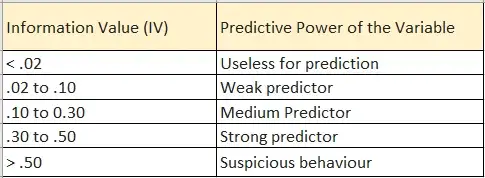

Table image source: https://medium.com/mlearning-ai/weight-of-evidence-woe-and-information-value-iv-how-to-use-it-in-eda-and-model-building-3b3b98efe0e8

So, based on the IV calculation we will use income, Age, experience, and own_realty as features for the model

## Modeling

In [53]:
# Make a result table to compare the accuracies
result_tb = pd.DataFrame(columns=['Algorithm','Accuracy','Precision','Recall','F1 Score'])

In [54]:
# Function to insert accuracy, f1 score, recall, and precision so we can compare the algorithms
def insertresult(name,test,predict):
    accuracy = accuracy_score(test, predict)
    f1 = f1_score(test, predict,average='weighted')
    recall = recall_score(test, predict,average='weighted')
    precision = precision_score(test, predict,average='weighted')
    result_tb.loc[len(result_tb.index)] = [name,accuracy,precision,recall,f1] 

In [55]:
# Select features based on IV calculation
x = df4[["income", "Age", "experience", "own_realty"]]
y = df4[["target"]]
y = y.astype('int')

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x,y, 
                                                    stratify=y, test_size=0.3,
                                                    random_state = 10086)

In [56]:
# Random Forest
model = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
insertresult('Random Forest',y_test,y_predict)

C:\Users\lenov\AppData\Local\Temp/ipykernel_7444/1018878134.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
# Decision Tree
model = DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=1024)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
insertresult('Decision Tree',y_test,y_predict)

In [58]:
# KNN
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
insertresult('KNN',y_test,y_predict)

C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [59]:
result_tb

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.983085,0.966456,0.983085,0.974699
1,Decision Tree,0.982129,0.973732,0.982129,0.976275
2,KNN,0.981556,0.971388,0.981556,0.975222
